# Global temperature changing trend and stablity

## 1. Introduction
Global warming is one problem that all human beings have concerned for several decades. We may heard from news coral die-offs are widespread in some areas, and record temperatures are being set in some places. Some people think global warming is just a conspiracy, the others over concerned that take many extreme actions.

In this project we will discuss and take a look with real data from Berkeley Earth. (n.d.). Climate Change: Earth Surface Temperature Data. Kaggle which record temperature for thousands cites and almost all the countries for last three centuries. These record the average temperature, average temperature uncertainty, time, location, and etc. We will see the how the global or some special location temperature change over time. Also we will use a way to measure how stable global and some places temperature over time. We do this by showing how the trend of average temperature changing globally and locally. 

## 2. Data loading and cleaning
We will start by reading our data, performing data cleaning, and adding additional columns. Our first main focus will be on the temperature data of major cities, as they are more likely to have accurate and complete temperature records. Then we will move to global temperature data. 

### 2.1.1 Major Cities Temperature Data
We will first read the major city temperature data. It records the average temperature over month, city name, country, latitude, longitude, and average temperature uncertainty.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
#Read data
file_path = "/Users/nick0o0o0/Library/Mobile Documents/com~apple~CloudDocs/gxyfile/third_year/ECO225/Project_One/archive/"

country_temp = pd.read_csv(file_path + "GlobalLandTemperaturesByCountry.csv")
major_city_temp = pd.read_csv(file_path + "GlobalLandTemperaturesByMajorCity.csv")

global_temp = pd.read_csv(file_path + "GlobalTemperatures.csv")

In [88]:
major_city_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


### 2.1.2 New Columns: Year, Month, NumLatitude, and Hemisphere
Now we will do data cleaning to create number version of Latitude in column NumLatitude and one string indicate which hemisphere it is in Hemisphere. With these column we will easy to find cities has similar latitude and esay to campare their data. We compare these data since they should have similar temperature as they has similar latitude. Also we will create new column called Year and Month to track the year and month seperatly. These two column are number so it is easy for us to slicing later on.

In [89]:
for row in major_city_temp.iterrows():
    index_value, column_value = row
    
    lati = column_value["Latitude"]
    time = column_value["dt"]

    if "N" in lati:
        major_city_temp.at[index_value, "Hemisphere"] = "N"
        major_city_temp.at[index_value, "NumLatitude"] = float(lati.replace("N",""))
        
    else:
        major_city_temp.at[index_value, "Hemisphere"] = "S"
        major_city_temp.at[index_value, "NumLatitude"] = float(lati.replace("S",""))
    
    major_city_temp.at[index_value, "Year"] = int(time[0:4])
    major_city_temp.at[index_value, "Month"] = int(time[5:7])
    
   
major_city_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Hemisphere,NumLatitude,Year,Month
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,N,5.63,1849.0,1.0
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,N,5.63,1849.0,2.0
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,N,5.63,1849.0,3.0
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,N,5.63,1849.0,4.0
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,N,5.63,1849.0,5.0


### 2.1.3 Change datatype to int for Year, Month, and RoundLati
Next we create a column called RoundLati which is the rounded latitude for that city since it may difficult to find several cities has the same and precise latitude in this data. We use rounded function to have a integer for the Latitude. Change the datatype for Year, Month, and RoundLati to integer.

In [90]:
major_city_temp["RoundLati"] = round(major_city_temp["NumLatitude"])
major_city_temp["Year"] = major_city_temp["Year"].astype(int)
major_city_temp["Month"] = major_city_temp["Month"].astype(int)
major_city_temp["RoundLati"] = major_city_temp["RoundLati"].astype(int)

major_city_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Hemisphere,NumLatitude,Year,Month,RoundLati
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,N,5.63,1849,1,6
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,N,5.63,1849,2,6
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,N,5.63,1849,3,6
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,N,5.63,1849,4,6
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,N,5.63,1849,5,6


### 2.1.4 Groupby city and year
Working on data over month may have too much data, so we want to get a aggregation with year. Next we use groupby method to get the average, standard deviation, maximum, and difference of temperature over each year of each city in major city data. This is useful when we want to compare data over year.

In [91]:
major_copy = major_city_temp.copy()
MajorCity_year_average = major_copy.groupby(["City", "Year"]).mean()
MajorCity_year_average.rename(columns={"AverageTemperature": "YearAverageTemperature"}, inplace=True)
MajorCity_year_average.head()

YearAverageTemperature  AverageTemperatureUncertainty  \
City    Year                                                          
Abidjan 1849               25.582583                       1.388583   
        1850               25.518250                       1.503667   
        1851               25.672333                       1.443583   
        1856               26.277333                       1.352000   
        1857               25.169091                       1.283091   

              NumLatitude     Month  RoundLati  
City    Year                                    
Abidjan 1849         5.63  6.500000        6.0  
        1850         5.63  6.500000        6.0  
        1851         5.63  6.500000        6.0  
        1856         5.63  3.666667        6.0  
        1857         5.63  6.909091        6.0

In [92]:
MajorCity_year_std = major_copy.groupby(["City", "Year"]).std()
MajorCity_year_std.rename(columns={"AverageTemperature": "YearAverageTemperatureStd"}, inplace=True)
MajorCity_year_std.head()

YearAverageTemperatureStd  AverageTemperatureUncertainty  \
City    Year                                                             
Abidjan 1849                   1.434284                       0.193051   
        1850                   1.398027                       0.320886   
        1851                   1.234958                       0.324207   
        1856                   1.177075                       0.253714   
        1857                   1.269211                       0.166744   

              NumLatitude     Month  RoundLati  
City    Year                                    
Abidjan 1849          0.0  3.605551        0.0  
        1850          0.0  3.605551        0.0  
        1851          0.0  3.605551        0.0  
        1856          0.0  2.160247        0.0  
        1857          0.0  3.477198        0.0

In [127]:
MajorCity_year_Max = major_copy.groupby(["City", "Year"]).max()
MajorCity_year_Max.rename(columns={"AverageTemperature": "YearAverageTemperatureMax"}, inplace=True)
MajorCity_year_Max.head()

dt  YearAverageTemperatureMax  \
City    Year                                          
Abidjan 1849  1849-12-01                     28.101   
        1850  1850-12-01                     27.890   
        1851  1851-12-01                     27.363   
        1852  1852-12-01                        NaN   
        1853  1853-12-01                        NaN   

              AverageTemperatureUncertainty        Country Latitude Longitude  \
City    Year                                                                    
Abidjan 1849                          1.838  Côte D'Ivoire    5.63N     3.23W   
        1850                          2.173  Côte D'Ivoire    5.63N     3.23W   
        1851                          2.358  Côte D'Ivoire    5.63N     3.23W   
        1852                            NaN  Côte D'Ivoire    5.63N     3.23W   
        1853                            NaN  Côte D'Ivoire    5.63N     3.23W   

             Hemisphere  NumLatitude  Month  RoundLati  
City    Year                                            
Abidjan 1849          N         5.63     12          6  
        1850          N         5.63     12          6  
        1851          N         5.63     12          6  
        1852          N         5.63     12          6  
        1853          N         5.63     12          6

In [147]:
Major3Col = major_copy[["City", "Year", "AverageTemperature"]]

Major3Col["AverageTemperature"].astype(float)

MajorCity_year_Dif = Major3Col.groupby(["City", "Year"]).max() - Major3Col.groupby(["City", "Year"]).min()
MajorCity_year_Dif.rename(columns={"AverageTemperature": "YearAverageTemperatureDifference"}, inplace=True)
MajorCity_year_Dif.head()

YearAverageTemperatureDifference
City    Year                                  
Abidjan 1849                             4.525
        1850                             4.132
        1851                             3.611
        1852                               NaN
        1853                               NaN

### 2.1.5 Cities with similar Latitude with Shanghai
Shanghai is my hometown, so I choose it and get a list of City with same latitude with it. Now the NumLatitude and Hemisphere are useful. First let's find the latitude of Shanghai. Then use locate a list of cities in the data tha has the similar latitude with Shanghai.

In [94]:
Shanghai_lati = major_city_temp.set_index("City").loc["Shanghai",["RoundLati", "Hemisphere"]]
Shanghai_lati.head(1)

,RoundLati,Hemisphere
City,,
Shanghai,31,N


In [95]:
SameLati_Shanghai = major_city_temp.set_index(["RoundLati", "Hemisphere"]).loc[31, "N"]["City"]

/var/folders/km/vjt389x91b93k1_jy0g3jscc0000gn/T/ipykernel_8538/1390243631.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  SameLati_Shanghai = major_city_temp.set_index(["RoundLati", "Hemisphere"]).loc[31, "N"]["City"]


These will be useful for slicing for a pivot table later on.

In [96]:
SameLati_Shanghai = list(set(SameLati_Shanghai))
SameLati_Shanghai

['Lahore', 'Chengdu', 'Shanghai', 'Faisalabad', 'Alexandria', 'Nanjing']

### 2.1.6 Pivot Table of average, standard deviation,  maximum, and difference of temperature for major cities over year
It's time to create a pivot table to track average, standard deviation, max, and difference of temperature of all the city and those with similar latitude with Shanghai over time

#### 2.1.6.a Pivot Table of average temperature of major cities over years

In [177]:
NoIndex_majorAvg = MajorCity_year_average.reset_index()
YearTempPivotTable = NoIndex_majorAvg.pivot_table(values="YearAverageTemperature", index="Year", columns="City")
YearTempPivotTable.dropna().head()

City,Abidjan,Addis Abeba,Ahmadabad,Aleppo,Alexandria,Ankara,Baghdad,Bangalore,Bangkok,Belo Horizonte,...,São Paulo,Taipei,Taiyuan,Tangshan,Tianjin,Tokyo,Toronto,Umm Durman,Wuhan,Xian
Year,,,,,,,,,,,,,,,,,,,,,
1891,25.109083,17.182167,26.318500,17.206333,20.094250,10.067083,22.569583,24.953667,27.128750,20.825667,...,19.562583,21.828833,8.061167,11.721167,12.002250,12.423167,6.277917,29.022500,16.713750,11.423833
1892,25.167250,17.049333,26.696167,17.561250,20.422167,10.676750,22.858750,24.592333,26.590500,20.617500,...,19.171750,21.752833,7.345750,10.985833,11.206750,12.098750,5.399000,28.673000,16.363583,11.035583
1893,25.330917,17.008917,25.452917,16.938583,19.662417,9.620833,22.424250,24.384333,26.366417,20.011333,...,18.491833,21.441917,7.409417,10.883083,10.962833,11.710083,4.829667,28.543417,16.091083,10.950500
1894,25.040500,16.983583,26.028250,16.478333,19.987750,9.544917,21.631250,24.749500,26.679167,20.888583,...,19.479750,22.003000,8.188167,11.847417,12.134750,12.923500,6.642167,28.422167,16.743583,11.439833
1895,25.371167,17.155250,26.497167,17.075833,20.141500,10.406500,22.046667,24.783250,27.047667,20.671833,...,19.433750,21.622667,7.183333,10.695000,10.861833,12.224583,5.124667,28.521667,16.254500,10.831083


#### 2.1.6.b Pivot Table of standard deviation of temperature of major cities over years

In [175]:
NoIndex_majorAvg = MajorCity_year_std.reset_index()
YearTempStdPivotTable = NoIndex_majorAvg.pivot_table(values="YearAverageTemperatureStd", index="Year", columns="City")
YearTempStdPivotTable.dropna().head()

City,Abidjan,Addis Abeba,Ahmadabad,Aleppo,Alexandria,Ankara,Baghdad,Bangalore,Bangkok,Belo Horizonte,...,São Paulo,Taipei,Taiyuan,Tangshan,Tianjin,Tokyo,Toronto,Umm Durman,Wuhan,Xian
Year,,,,,,,,,,,,,,,,,,,,,
1891,1.554297,1.098795,4.624266,9.208364,5.136206,8.872503,9.478075,1.853298,1.701626,1.998533,...,2.612213,4.229497,11.022779,10.510345,11.348283,8.658213,9.335829,3.906152,8.919916,9.559094
1892,1.526103,1.341070,4.388634,8.956316,4.613374,8.601315,9.419345,2.018332,1.884226,2.513824,...,3.202877,4.262683,11.497039,11.004865,11.935681,9.253717,10.627044,3.765828,9.127062,9.764897
1893,1.027898,0.917749,4.664085,9.049067,5.129279,8.645449,9.367465,1.783785,1.846026,2.027534,...,2.893227,4.714119,11.652757,11.144945,12.025537,9.150216,11.449469,3.749737,9.531243,10.057864
1894,1.336814,1.130103,4.199596,9.285787,5.049266,8.936288,9.644988,1.882588,1.726106,2.753685,...,3.495212,4.173105,11.273610,10.788902,11.655335,9.068735,9.936172,3.733189,9.141622,9.758826
1895,1.236791,1.203517,4.485187,8.497871,4.314094,7.859475,9.126789,1.901630,1.603320,2.054009,...,2.829970,4.407286,11.467573,11.034505,12.007969,8.591745,11.252856,3.852514,9.338230,9.890433


#### 2.1.6.c Pivot Table of maximum of temperature of major cities over years

In [176]:
NoIndex_majorAvg = MajorCity_year_Max.reset_index()
YearTempMaxPivotTable = NoIndex_majorAvg.pivot_table(values="YearAverageTemperatureMax", index="Year", columns="City")
YearTempMaxPivotTable.dropna().head()

City,Abidjan,Addis Abeba,Ahmadabad,Aleppo,Alexandria,Ankara,Baghdad,Bangalore,Bangkok,Belo Horizonte,...,São Paulo,Taipei,Taiyuan,Tangshan,Tianjin,Tokyo,Toronto,Umm Durman,Wuhan,Xian
Year,,,,,,,,,,,,,,,,,,,,,
1891,27.067,18.783,32.555,29.493,27.042,22.249,34.628,27.989,30.450,23.274,...,22.967,27.215,21.829,24.589,25.745,23.821,17.690,34.245,28.231,24.010
1892,27.124,19.040,32.874,28.887,26.300,21.698,34.588,28.046,28.816,23.866,...,23.690,27.504,22.081,25.130,25.780,24.760,18.927,33.587,28.752,24.167
1893,26.671,18.531,31.743,29.305,26.240,21.523,34.405,27.571,28.664,22.607,...,22.730,27.637,22.077,25.001,26.337,24.789,18.952,33.265,28.365,24.038
1894,26.866,18.509,32.506,28.452,26.321,21.350,33.627,27.661,29.262,24.135,...,24.626,27.449,22.433,25.193,26.342,25.600,19.862,33.507,29.033,24.634
1895,26.816,19.093,33.364,29.079,26.279,22.163,34.228,27.789,29.568,23.389,...,23.622,27.254,21.261,23.952,25.175,24.816,18.861,33.967,28.318,23.736


#### 2.1.6.d Pivot Table of temperature difference of major cities over years

In [137]:
NoIndex_majorAvg = MajorCity_year_Dif.reset_index()
YearTempDifPivotTable = NoIndex_majorAvg.pivot_table(values="YearAverageTemperatureDifference", index="Year", columns="City")
YearTempDifPivotTable

City,Abidjan,Addis Abeba,Ahmadabad,Aleppo,Alexandria,Ankara,Baghdad,Bangalore,Bangkok,Belo Horizonte,...,São Paulo,Taipei,Taiyuan,Tangshan,Tianjin,Tokyo,Toronto,Umm Durman,Wuhan,Xian
Year,,,,,,,,,,,,,,,,,,,,,
1743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN
1744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.362,NaN,NaN,NaN
1745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.201,NaN,NaN,NaN
1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,29.758,NaN,NaN,NaN
1751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,28.043,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,3.860,2.851,12.460,24.474,12.071,21.831,26.479,5.584,6.266,5.733,...,8.439,11.962,30.508,28.469,30.013,21.329,29.673,11.534,25.322,27.016
2010,4.196,3.192,15.236,23.850,12.547,24.082,24.759,6.499,5.160,6.797,...,8.070,11.087,31.232,30.406,33.544,24.687,28.504,10.168,24.104,25.959
2011,4.098,4.065,14.186,24.443,12.000,23.513,27.077,5.024,4.239,5.999,...,8.480,13.838,33.208,31.094,32.741,24.471,31.304,13.102,28.269,29.706


### 2.2.1 Global temprature data
We will do data cleaning to global temperature too and create a new column called year to track which year of each row. Then do groupby year to get a average, standard deviationm, and maximum temperature of land, ocean over years.

In [99]:
for row in global_temp.iterrows():
    row_index, row_values = row
    global_temp.at[row_index, "Year"] = row_values["dt"][0:4]

global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Year
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


### 2.2.2 Global average temperature group by years

In [250]:
YearAverageGlobal = global_temp.groupby("Year").mean()
YearAverageGlobal.index = YearAverageGlobal.index.astype(int)
YearAverageGlobal.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
Year,,,,,,,,
1750,8.719364,2.637818,NaN,NaN,NaN,NaN,NaN,NaN
1751,7.976143,2.781143,NaN,NaN,NaN,NaN,NaN,NaN
1752,5.779833,2.977000,NaN,NaN,NaN,NaN,NaN,NaN
1753,8.388083,3.176000,NaN,NaN,NaN,NaN,NaN,NaN
1754,8.469333,3.494250,NaN,NaN,NaN,NaN,NaN,NaN


### 2.2.3 Global average standard deviation temperature group by years

In [251]:
YearStdGlobal = global_temp.groupby("Year").std()
YearStdGlobal.index = YearStdGlobal.index.astype(int)
YearStdGlobal.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
Year,,,,,,,,
1750,4.850538,0.647770,NaN,NaN,NaN,NaN,NaN,NaN
1751,5.274027,0.709716,NaN,NaN,NaN,NaN,NaN,NaN
1752,2.926488,0.478218,NaN,NaN,NaN,NaN,NaN,NaN
1753,5.511233,1.147459,NaN,NaN,NaN,NaN,NaN,NaN
1754,5.351652,1.504625,NaN,NaN,NaN,NaN,NaN,NaN


### 2.2.4 Global maximum temperature group by years

In [252]:
YearMaxGlobal = global_temp.groupby("Year").max()
YearMaxGlobal.index = YearMaxGlobal.index.astype(int)
YearMaxGlobal.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
Year,,,,,,,,,
1750,1750-12-01,15.868,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1751,1751-12-01,14.405,3.827,NaN,NaN,NaN,NaN,NaN,NaN
1752,1752-12-01,8.265,3.789,NaN,NaN,NaN,NaN,NaN,NaN
1753,1753-12-01,15.092,6.341,NaN,NaN,NaN,NaN,NaN,NaN
1754,1754-12-01,14.681,7.492,NaN,NaN,NaN,NaN,NaN,NaN


### 2.2.5 Global difference temperature group by years

In [253]:
global_temp_copy = global_temp.drop(global_temp.columns[0], axis=1)
global_list = global_temp_copy.columns.to_list()
for col in global_list:
    global_temp_copy[col].astype(float)
    
YearDifGlobal = global_temp_copy.groupby("Year").max() - global_temp_copy.groupby("Year").min()
YearDifGlobal.index = YearDifGlobal.index.astype(int)
YearDifGlobal

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
Year,,,,,,,,
1750,13.096,1.978,NaN,NaN,NaN,NaN,NaN,NaN
1751,13.442,2.026,NaN,NaN,NaN,NaN,NaN,NaN
1752,7.917,1.391,NaN,NaN,NaN,NaN,NaN,NaN
1753,14.533,4.412,NaN,NaN,NaN,NaN,NaN,NaN
1754,15.930,5.600,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2011,12.200,0.067,12.598,0.106,11.718,0.061,3.640,0.007
2012,11.919,0.062,12.315,0.071,11.462,0.122,3.591,0.005
2013,11.318,0.052,11.482,0.101,11.056,0.108,3.386,0.006


## 3. Summary Statistics Tables
Now let's has a summary with what we did and highlight which datas are important. First we have three kind pivot tables for major cities and global temperature. These three kinds table record the average, maximum, standard deviation, and difference of temperature changing over years for major cities or global land and ocean. Average and maximum of temperature are very useful and convenient to plot. We can study the tempreture trend over years when we graph them in next section. The standard deviation temperature and tempreture difference changing over years help us to study that whether the global or local temperature becomes more unstable, as the standard deviation getting bigger, it means the temperature for 12 months are more discrete which means the for the same area of globally the whether get more and more extreme; as the temperature difference getting bigger it means differece between the lowest month temperature and highest temperature are geting bigger. We can use these variables to study both global and specific city temperature.

### 3.1 Major Cities

#### 3.1.a Pivot Table of average temperature of major cities over years

In [141]:
YearTempPivotTable

City,Abidjan,Addis Abeba,Ahmadabad,Aleppo,Alexandria,Ankara,Baghdad,Bangalore,Bangkok,Belo Horizonte,...,São Paulo,Taipei,Taiyuan,Tangshan,Tianjin,Tokyo,Toronto,Umm Durman,Wuhan,Xian
Year,,,,,,,,,,,,,,,,,,,,,
1891,25.109083,17.182167,26.318500,17.206333,20.094250,10.067083,22.569583,24.953667,27.128750,20.825667,...,19.562583,21.828833,8.061167,11.721167,12.002250,12.423167,6.277917,29.022500,16.713750,11.423833
1892,25.167250,17.049333,26.696167,17.561250,20.422167,10.676750,22.858750,24.592333,26.590500,20.617500,...,19.171750,21.752833,7.345750,10.985833,11.206750,12.098750,5.399000,28.673000,16.363583,11.035583
1893,25.330917,17.008917,25.452917,16.938583,19.662417,9.620833,22.424250,24.384333,26.366417,20.011333,...,18.491833,21.441917,7.409417,10.883083,10.962833,11.710083,4.829667,28.543417,16.091083,10.950500
1894,25.040500,16.983583,26.028250,16.478333,19.987750,9.544917,21.631250,24.749500,26.679167,20.888583,...,19.479750,22.003000,8.188167,11.847417,12.134750,12.923500,6.642167,28.422167,16.743583,11.439833
1895,25.371167,17.155250,26.497167,17.075833,20.141500,10.406500,22.046667,24.783250,27.047667,20.671833,...,19.433750,21.622667,7.183333,10.695000,10.861833,12.224583,5.124667,28.521667,16.254500,10.831083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,26.982000,18.765333,28.095833,18.438083,21.670500,11.628250,23.867333,25.725750,27.785667,22.248750,...,20.775583,23.135583,9.101333,12.630583,12.967750,13.546083,6.282583,30.460167,17.816750,12.528417
2010,27.445417,18.298250,28.017833,19.979417,22.459583,13.268583,25.493917,25.705250,28.536917,22.116333,...,20.716583,23.002417,9.080667,12.379000,12.249500,13.820500,7.774500,30.730167,17.568250,12.589750
2011,27.017583,18.606750,27.290417,18.016583,21.181500,10.389667,23.437500,25.362083,27.558333,21.740500,...,20.330083,22.551833,8.643167,12.258833,12.770250,13.321833,7.299583,29.963667,17.387583,12.075167


#### 3.1.b Pivot Table of max temperature of major cities over years

In [143]:
YearTempMaxPivotTable

City,Abidjan,Addis Abeba,Ahmadabad,Aleppo,Alexandria,Ankara,Baghdad,Bangalore,Bangkok,Belo Horizonte,...,São Paulo,Taipei,Taiyuan,Tangshan,Tianjin,Tokyo,Toronto,Umm Durman,Wuhan,Xian
Year,,,,,,,,,,,,,,,,,,,,,
1891,27.067,18.783,32.555,29.493,27.042,22.249,34.628,27.989,30.450,23.274,...,22.967,27.215,21.829,24.589,25.745,23.821,17.690,34.245,28.231,24.010
1892,27.124,19.040,32.874,28.887,26.300,21.698,34.588,28.046,28.816,23.866,...,23.690,27.504,22.081,25.130,25.780,24.760,18.927,33.587,28.752,24.167
1893,26.671,18.531,31.743,29.305,26.240,21.523,34.405,27.571,28.664,22.607,...,22.730,27.637,22.077,25.001,26.337,24.789,18.952,33.265,28.365,24.038
1894,26.866,18.509,32.506,28.452,26.321,21.350,33.627,27.661,29.262,24.135,...,24.626,27.449,22.433,25.193,26.342,25.600,19.862,33.507,29.033,24.634
1895,26.816,19.093,33.364,29.079,26.279,22.163,34.228,27.789,29.568,23.389,...,23.622,27.254,21.261,23.952,25.175,24.816,18.861,33.967,28.318,23.736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,28.805,20.335,34.075,30.216,27.663,22.447,35.523,28.769,29.973,24.552,...,24.398,28.586,23.237,25.967,26.774,24.193,19.017,35.597,29.606,25.500
2010,29.596,20.102,35.419,32.629,28.806,26.044,37.899,29.218,31.115,25.032,...,24.830,28.782,24.718,27.346,28.239,27.295,21.367,35.493,29.582,25.722
2011,28.922,21.223,33.438,31.024,27.637,23.840,37.184,28.025,29.260,24.676,...,24.412,28.711,22.476,25.817,27.074,25.288,21.956,35.356,29.765,24.895


#### 3.1.c Pivot Table of temperature difference of major cities over years

In [145]:
YearTempDifPivotTable

City,Abidjan,Addis Abeba,Ahmadabad,Aleppo,Alexandria,Ankara,Baghdad,Bangalore,Bangkok,Belo Horizonte,...,São Paulo,Taipei,Taiyuan,Tangshan,Tianjin,Tokyo,Toronto,Umm Durman,Wuhan,Xian
Year,,,,,,,,,,,,,,,,,,,,,
1743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN
1744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.362,NaN,NaN,NaN
1745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.201,NaN,NaN,NaN
1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,29.758,NaN,NaN,NaN
1751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,28.043,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,3.860,2.851,12.460,24.474,12.071,21.831,26.479,5.584,6.266,5.733,...,8.439,11.962,30.508,28.469,30.013,21.329,29.673,11.534,25.322,27.016
2010,4.196,3.192,15.236,23.850,12.547,24.082,24.759,6.499,5.160,6.797,...,8.070,11.087,31.232,30.406,33.544,24.687,28.504,10.168,24.104,25.959
2011,4.098,4.065,14.186,24.443,12.000,23.513,27.077,5.024,4.239,5.999,...,8.480,13.838,33.208,31.094,32.741,24.471,31.304,13.102,28.269,29.706


#### 3.1.d Pivot Table of standard deviation temperature of major cities over years

In [148]:
YearTempStdPivotTable

City,Abidjan,Addis Abeba,Ahmadabad,Aleppo,Alexandria,Ankara,Baghdad,Bangalore,Bangkok,Belo Horizonte,...,São Paulo,Taipei,Taiyuan,Tangshan,Tianjin,Tokyo,Toronto,Umm Durman,Wuhan,Xian
Year,,,,,,,,,,,,,,,,,,,,,
1891,1.554297,1.098795,4.624266,9.208364,5.136206,8.872503,9.478075,1.853298,1.701626,1.998533,...,2.612213,4.229497,11.022779,10.510345,11.348283,8.658213,9.335829,3.906152,8.919916,9.559094
1892,1.526103,1.341070,4.388634,8.956316,4.613374,8.601315,9.419345,2.018332,1.884226,2.513824,...,3.202877,4.262683,11.497039,11.004865,11.935681,9.253717,10.627044,3.765828,9.127062,9.764897
1893,1.027898,0.917749,4.664085,9.049067,5.129279,8.645449,9.367465,1.783785,1.846026,2.027534,...,2.893227,4.714119,11.652757,11.144945,12.025537,9.150216,11.449469,3.749737,9.531243,10.057864
1894,1.336814,1.130103,4.199596,9.285787,5.049266,8.936288,9.644988,1.882588,1.726106,2.753685,...,3.495212,4.173105,11.273610,10.788902,11.655335,9.068735,9.936172,3.733189,9.141622,9.758826
1895,1.236791,1.203517,4.485187,8.497871,4.314094,7.859475,9.126789,1.901630,1.603320,2.054009,...,2.829970,4.407286,11.467573,11.034505,12.007969,8.591745,11.252856,3.852514,9.338230,9.890433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,1.214802,1.125352,3.992689,8.804600,4.750174,7.878134,9.471805,1.683742,1.687805,1.807003,...,2.696615,4.295982,11.362592,10.910590,11.723112,7.789145,9.958303,3.833276,9.196591,9.675455
2010,1.485346,1.132631,4.769002,8.708319,4.408005,8.128011,9.504559,2.034479,1.718818,2.060134,...,2.621664,4.121506,11.066670,10.772454,11.833615,8.847020,10.392825,3.336938,8.643490,9.336606
2011,1.362240,1.304385,4.274516,9.386984,4.715810,8.739588,10.374320,1.645668,1.321912,1.702644,...,2.596269,4.890004,11.332442,10.795299,11.572411,8.901225,10.679270,3.990297,9.261241,9.940693


### 3.2 Global

#### 3.2.a Pivot Table of average temperature of Global over years

In [149]:
YearAverageGlobal

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
Year,,,,,,,,
1750,8.719364,2.637818,NaN,NaN,NaN,NaN,NaN,NaN
1751,7.976143,2.781143,NaN,NaN,NaN,NaN,NaN,NaN
1752,5.779833,2.977000,NaN,NaN,NaN,NaN,NaN,NaN
1753,8.388083,3.176000,NaN,NaN,NaN,NaN,NaN,NaN
1754,8.469333,3.494250,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2011,9.516000,0.082000,15.284833,0.114333,3.827667,0.136583,15.769500,0.059000
2012,9.507333,0.083417,15.332833,0.107333,3.756167,0.145333,15.802333,0.061500
2013,9.606500,0.097667,15.373833,0.115500,3.911333,0.149833,15.854417,0.064667


#### 3.2.b Pivot Table of maximum temperature of Global years

In [150]:
YearMaxGlobal

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
Year,,,,,,,,
1750,13.096,1.978,NaN,NaN,NaN,NaN,NaN,NaN
1751,13.442,2.026,NaN,NaN,NaN,NaN,NaN,NaN
1752,7.917,1.391,NaN,NaN,NaN,NaN,NaN,NaN
1753,14.533,4.412,NaN,NaN,NaN,NaN,NaN,NaN
1754,15.930,5.600,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2011,12.200,0.067,12.598,0.106,11.718,0.061,3.640,0.007
2012,11.919,0.062,12.315,0.071,11.462,0.122,3.591,0.005
2013,11.318,0.052,11.482,0.101,11.056,0.108,3.386,0.006


#### 3.2.c Pivot Table of temperature difference of Global years

In [151]:
YearDifGlobal

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
Year,,,,,,,,
1750,13.096,1.978,NaN,NaN,NaN,NaN,NaN,NaN
1751,13.442,2.026,NaN,NaN,NaN,NaN,NaN,NaN
1752,7.917,1.391,NaN,NaN,NaN,NaN,NaN,NaN
1753,14.533,4.412,NaN,NaN,NaN,NaN,NaN,NaN
1754,15.930,5.600,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2011,12.200,0.067,12.598,0.106,11.718,0.061,3.640,0.007
2012,11.919,0.062,12.315,0.071,11.462,0.122,3.591,0.005
2013,11.318,0.052,11.482,0.101,11.056,0.108,3.386,0.006


#### 3.2.d Pivot Table of standard deviation temperature of Global years

In [152]:
YearStdGlobal

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
Year,,,,,,,,
1750,4.850538,0.647770,NaN,NaN,NaN,NaN,NaN,NaN
1751,5.274027,0.709716,NaN,NaN,NaN,NaN,NaN,NaN
1752,2.926488,0.478218,NaN,NaN,NaN,NaN,NaN,NaN
1753,5.511233,1.147459,NaN,NaN,NaN,NaN,NaN,NaN
1754,5.351652,1.504625,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2011,4.497240,0.020868,4.639974,0.031477,4.329443,0.019528,1.343160,0.002132
2012,4.549403,0.020210,4.711956,0.026797,4.366643,0.033535,1.355500,0.001931
2013,4.306305,0.016350,4.393565,0.032089,4.220844,0.034606,1.274133,0.002060


## 4. Plots, Figures

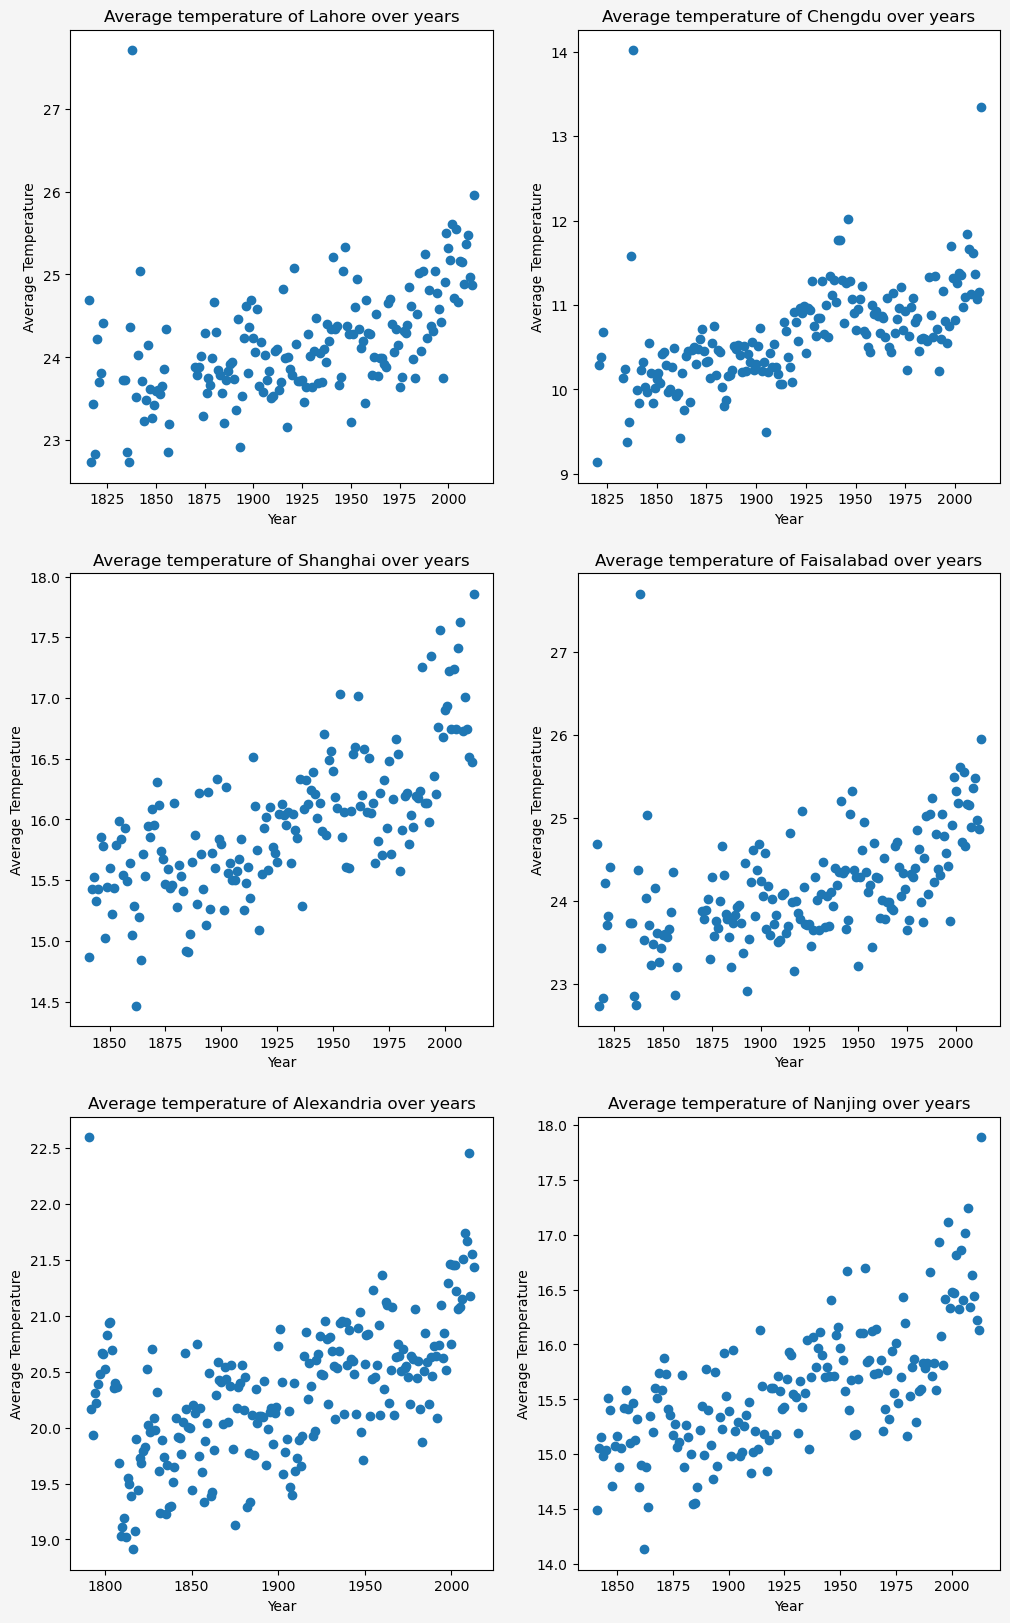

In [237]:
fig, ax = plt.subplots(3, 2, figsize=(12, 20))
SameLatiArray = np.array(SameLati_Shanghai).reshape(3, 2)
fig.set_facecolor((0.96, 0.96, 0.96))

for i in range(3):
    for j in range(2):
        
        ax[i, j].scatter(x=YearTempPivotTable.index, y=YearTempPivotTable[SameLatiArray[i, j]], )
        ax[i, j].set_title("Average temperature of "+ SameLatiArray[i, j] +" over years")
        ax[i, j].set_xlabel("Year")
        ax[i, j].set_ylabel("Average Temperature")

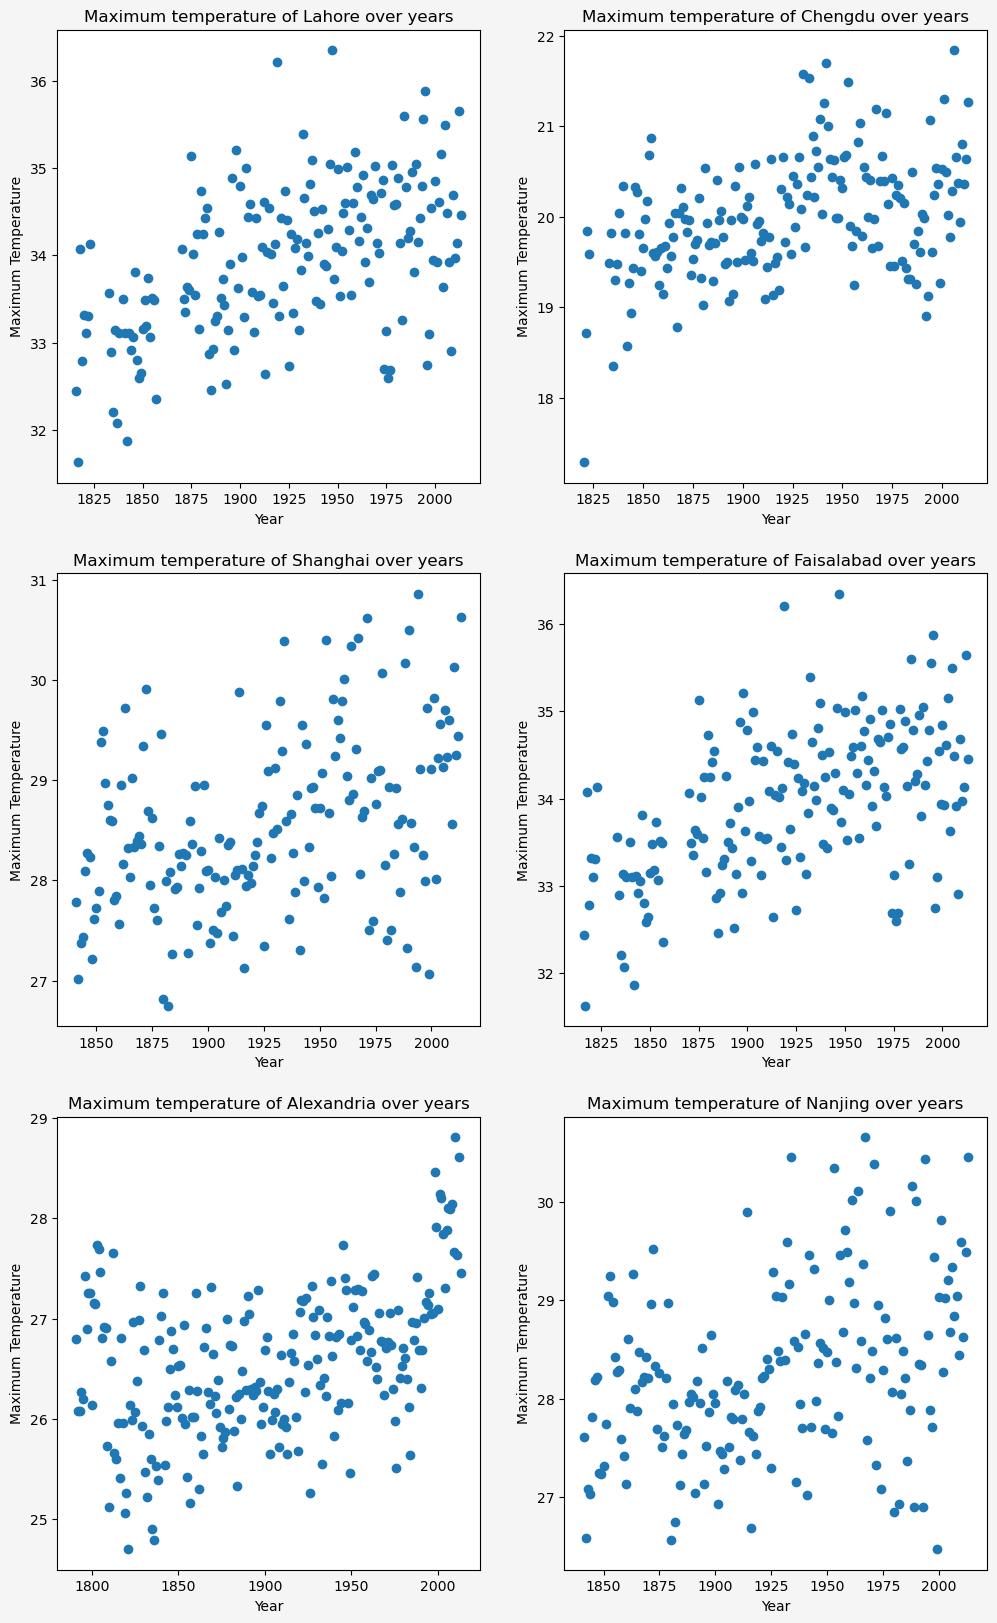

In [236]:
datapicked = YearTempMaxPivotTable
fig, ax = plt.subplots(3, 2, figsize=(12, 20))
SameLatiArray = np.array(SameLati_Shanghai).reshape(3, 2)
fig.set_facecolor((0.96, 0.96, 0.96))

for i in range(3):
    for j in range(2):
        
        ax[i, j].scatter(x=datapicked.index, y=datapicked[SameLatiArray[i, j]], )
        ax[i, j].set_title("Maximum temperature of "+ SameLatiArray[i, j] +" over years")
        ax[i, j].set_xlabel("Year")
        ax[i, j].set_ylabel("Maximum Temperature")

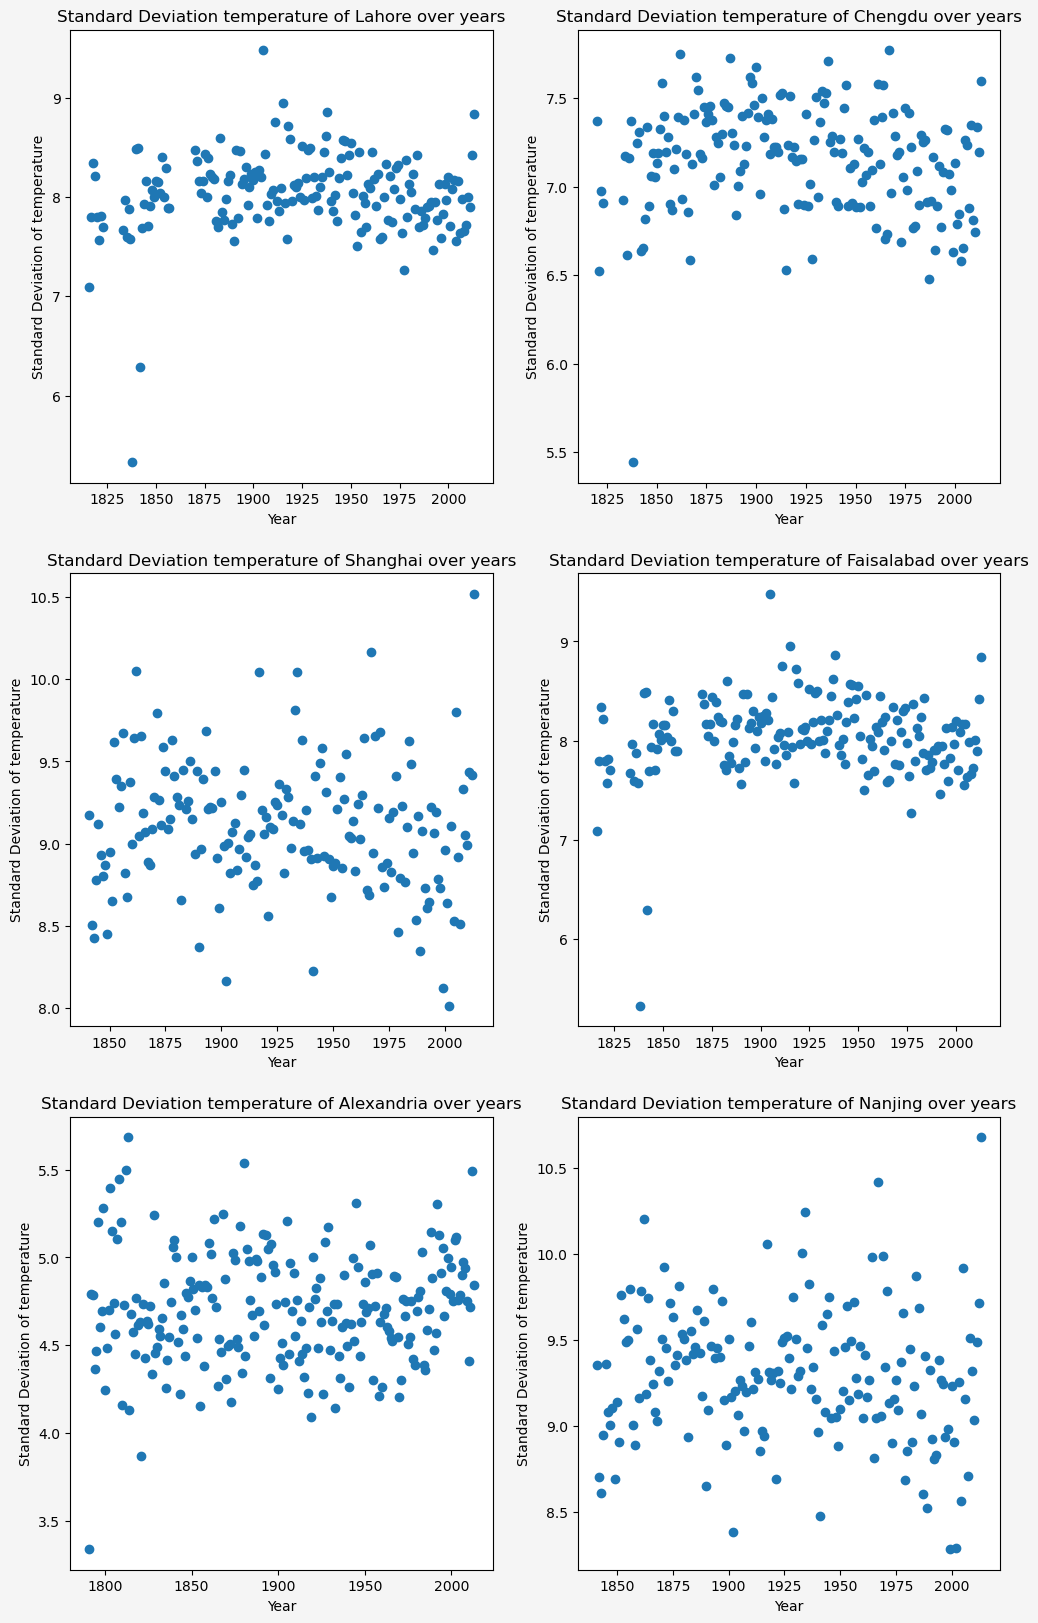

In [241]:
datapicked = YearTempStdPivotTable
fig, ax = plt.subplots(3, 2, figsize=(12, 20))
SameLatiArray = np.array(SameLati_Shanghai).reshape(3, 2)
fig.set_facecolor((0.96, 0.96, 0.96))

for i in range(3):
    for j in range(2):
        
        ax[i, j].scatter(x=datapicked.index, y=datapicked[SameLatiArray[i, j]], )
        ax[i, j].set_title("Standard Deviation temperature of "+ SameLatiArray[i, j] +" over years")
        ax[i, j].set_xlabel("Year")
        ax[i, j].set_ylabel("Standard Deviation of temperature")

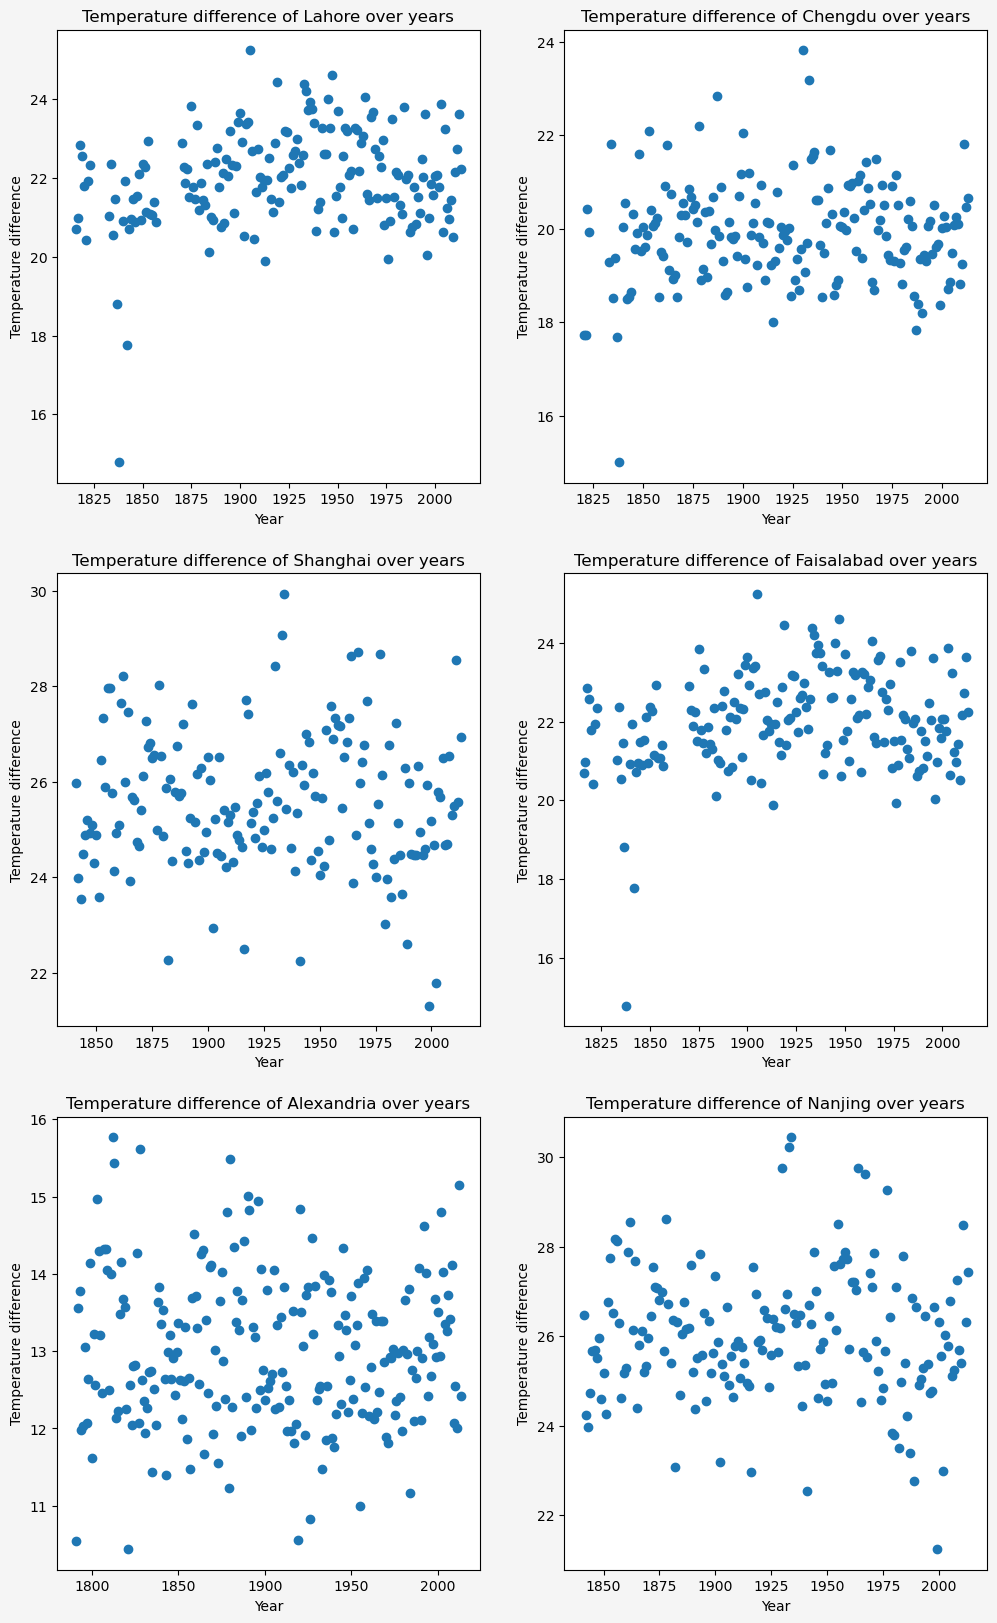

In [242]:
datapicked = YearTempDifPivotTable
fig, ax = plt.subplots(3, 2, figsize=(12, 20))
SameLatiArray = np.array(SameLati_Shanghai).reshape(3, 2)
fig.set_facecolor((0.96, 0.96, 0.96))

for i in range(3):
    for j in range(2):
        
        ax[i, j].scatter(x=datapicked.index, y=datapicked[SameLatiArray[i, j]], )
        ax[i, j].set_title("Temperature difference of "+ SameLatiArray[i, j] +" over years")
        ax[i, j].set_xlabel("Year")
        ax[i, j].set_ylabel("Temperature difference")

In [244]:
YearAverageGlobal

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
Year,,,,,,,,
1750,8.719364,2.637818,NaN,NaN,NaN,NaN,NaN,NaN
1751,7.976143,2.781143,NaN,NaN,NaN,NaN,NaN,NaN
1752,5.779833,2.977000,NaN,NaN,NaN,NaN,NaN,NaN
1753,8.388083,3.176000,NaN,NaN,NaN,NaN,NaN,NaN
1754,8.469333,3.494250,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2011,9.516000,0.082000,15.284833,0.114333,3.827667,0.136583,15.769500,0.059000
2012,9.507333,0.083417,15.332833,0.107333,3.756167,0.145333,15.802333,0.061500
2013,9.606500,0.097667,15.373833,0.115500,3.911333,0.149833,15.854417,0.064667


Text(0.5, 1.0, 'Average temperature of ocean and land of earth over years')

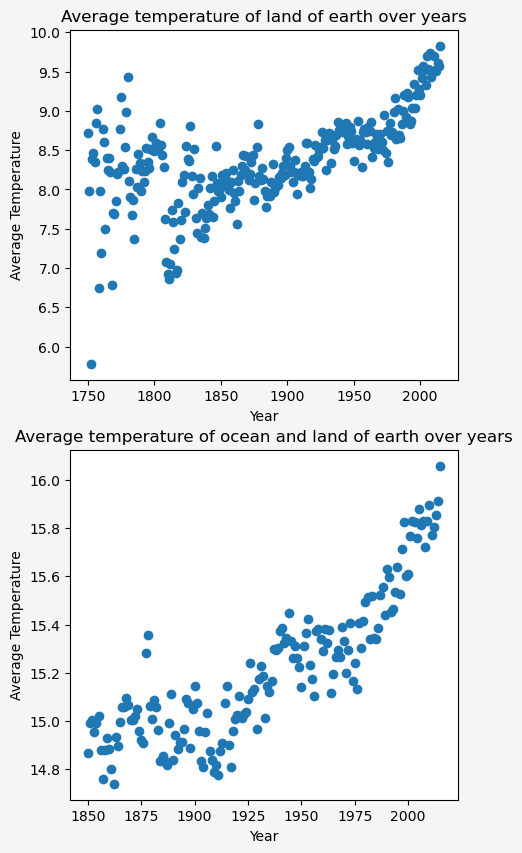

In [268]:
datapicked = YearAverageGlobal
column_picked = ["LandAverageTemperature", "LandAndOceanAverageTemperature"]
fig, ax = plt.subplots(2, 1, figsize=(5,10))

fig.set_facecolor((0.96, 0.96, 0.96))

for i in range(2):        
    ax[i].scatter(x=datapicked.index, y=datapicked[column_picked[i]])
    ax[i].set_xlabel("Year")
    ax[i].set_ylabel("Average Temperature")
    
ax[0].set_title("Average temperature of land of earth over years")
ax[1].set_title("Average temperature of ocean and land of earth over years")

Text(0.5, 1.0, 'Maximum temperature of ocean and land of earth over years')

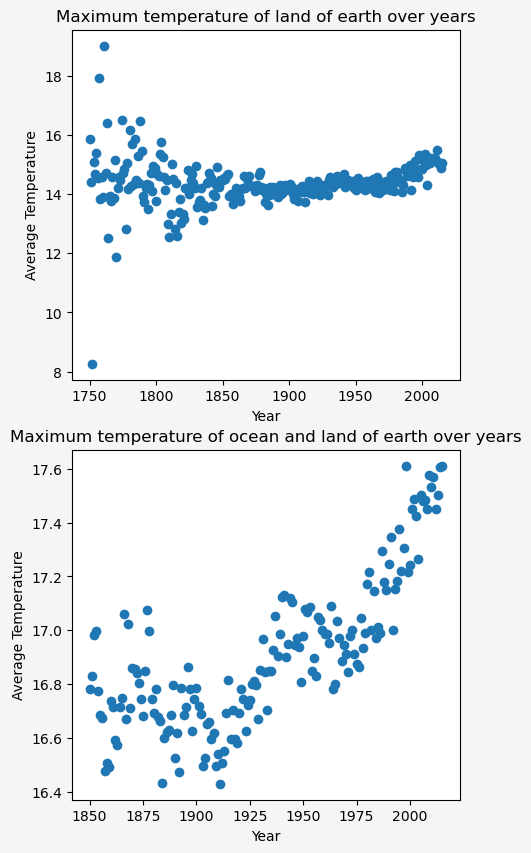

In [269]:
datapicked = YearMaxGlobal
column_picked = ["LandAverageTemperature", "LandAndOceanAverageTemperature"]
fig, ax = plt.subplots(2, 1, figsize=(5,10))

fig.set_facecolor((0.96, 0.96, 0.96))

for i in range(2):        
    ax[i].scatter(x=datapicked.index, y=datapicked[column_picked[i]])
    ax[i].set_xlabel("Year")
    ax[i].set_ylabel("Average Temperature")
    
ax[0].set_title("Maximum temperature of land of earth over years")
ax[1].set_title("Maximum temperature of ocean and land of earth over years")

Text(0.5, 1.0, 'Temperature difference of ocean and land of earth over years')

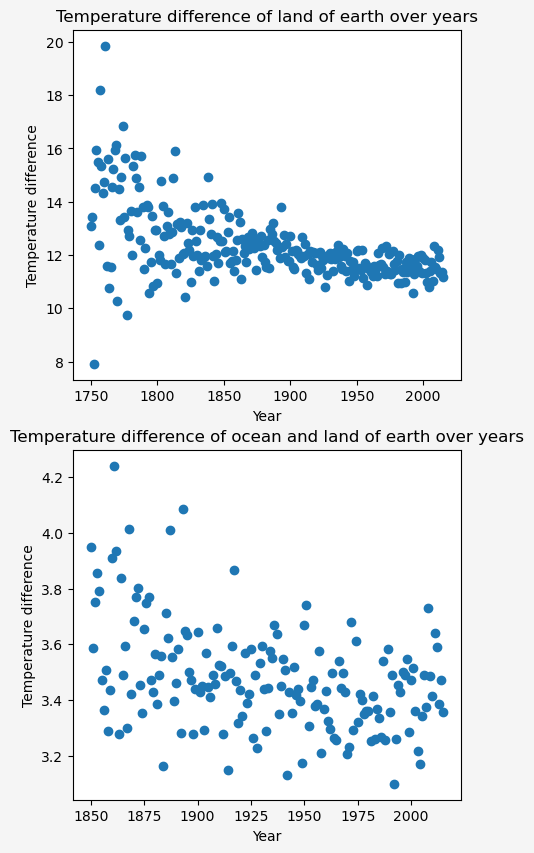

In [271]:
datapicked = YearDifGlobal
column_picked = ["LandAverageTemperature", "LandAndOceanAverageTemperature"]
fig, ax = plt.subplots(2, 1, figsize=(5, 10))

fig.set_facecolor((0.96, 0.96, 0.96))

for i in range(2):        
    ax[i].scatter(x=datapicked.index, y=datapicked[column_picked[i]])
    ax[i].set_xlabel("Year")
    ax[i].set_ylabel("Temperature difference")
    
ax[0].set_title("Temperature difference of land of earth over years")
ax[1].set_title("Temperature difference of ocean and land of earth over years")

Text(0.5, 1.0, 'Standard Deviation of temperature and land of earth over years')

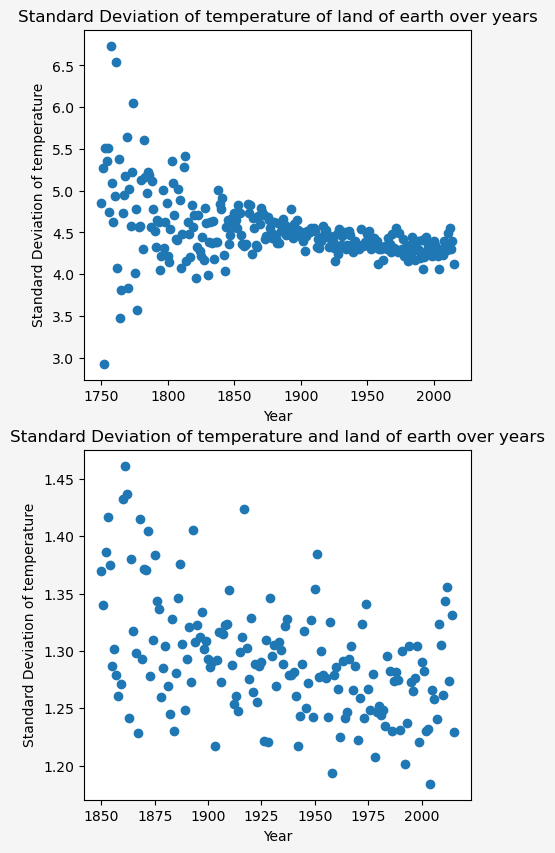

In [274]:
datapicked = YearStdGlobal
column_picked = ["LandAverageTemperature", "LandAndOceanAverageTemperature"]
fig, ax = plt.subplots(2, 1, figsize=(5, 10))

fig.set_facecolor((0.96, 0.96, 0.96))

for i in range(2):        
    ax[i].scatter(x=datapicked.index, y=datapicked[column_picked[i]])
    ax[i].set_xlabel("Year")
    ax[i].set_ylabel("Standard Deviation of temperature")
    
ax[0].set_title("Standard Deviation of temperature of land of earth over years")
ax[1].set_title("Standard Deviation of temperature and land of earth over years")